# Mall Customers

### Key Insights

1. Targeted Marketing:

By analyzing the cluster characteristics (age, income, and spending behavior), you can create more tailored marketing strategies for each group.

- Cluster 0: Likely to respond well to high-end product offers, with a high spending score.
- Cluster 1: Can be targeted with promotions or discounts to increase engagement, as their spending behavior is lower.
- Cluster 3: Younger customers, with moderate spending, can be targeted with budget-friendly products or services.

2. Customer Profiling:

Knowing the age, income, and spending habits of each segment allows businesses to refine customer profiles and improve personalization in communication and product offerings.

3. Improving Customer Engagement:

Understanding which segments are less responsive (e.g., Cluster 1 with low spending) allows for strategies to engage them better, such as loyalty programs or targeted discounts.

4. Product Development and Pricing:

Tailoring product offerings and setting price points that cater to specific clusters, based on their income and spending behaviors, can drive sales more effectively.

In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load the Data

# Unzipping the file
with zipfile.ZipFile('Mall_Customers.zip', 'r') as zip_ref:
    zip_ref.extractall('Mall_Customers')

# Get the file list and load the CSV file
file_list = os.listdir('Mall_Customers')
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Mall_Customers/{csv_file}')

# Display the first few rows of the dataset
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Exploratory Data Analysis (EDA)
# Check the basic info of the dataset
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Check the unique values in the categorical column (if any)
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary Statistics for Numerical Columns:

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std   

In [4]:
# Preprocessing

# Drop non-relevant columns (like 'CustomerID')
df = df.drop(['CustomerID'], axis=1)

# Consistent encoding of the categorical feature 'Genre' (Male = 1, Female = 0)
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

# Handle outliers in 'Spending Score' using IQR
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Spending Score (1-100)'] >= (Q1 - 1.5 * IQR)) & 
        (df['Spending Score (1-100)'] <= (Q3 + 1.5 * IQR))]

In [5]:
# Scaling the Data
# Standardize the data before applying clustering to ensure all features contribute equally
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the scaled dataframe to verify
print(df_scaled.head())

      Genre       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

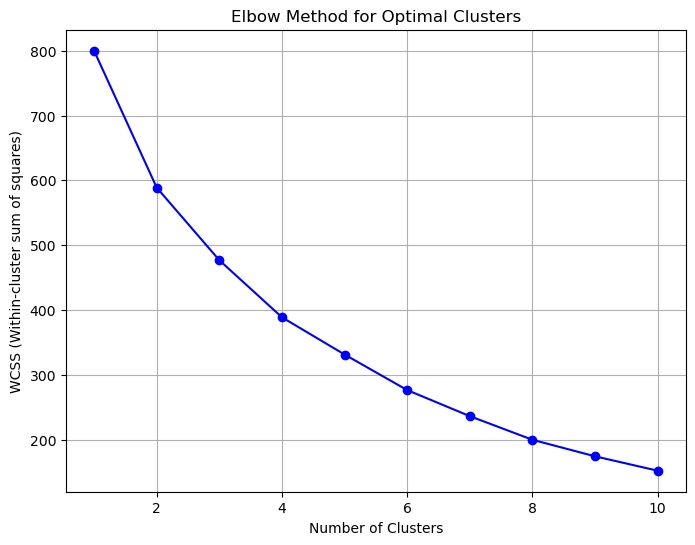

In [6]:
# Applying K-Means Clustering

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)  # Fit the model
    wcss.append(kmeans.inertia_)  # Append the WCSS value

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.grid(True)
plt.show()

In [7]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Explained variance ratio of PCA components: [0.33690046 0.26230645]


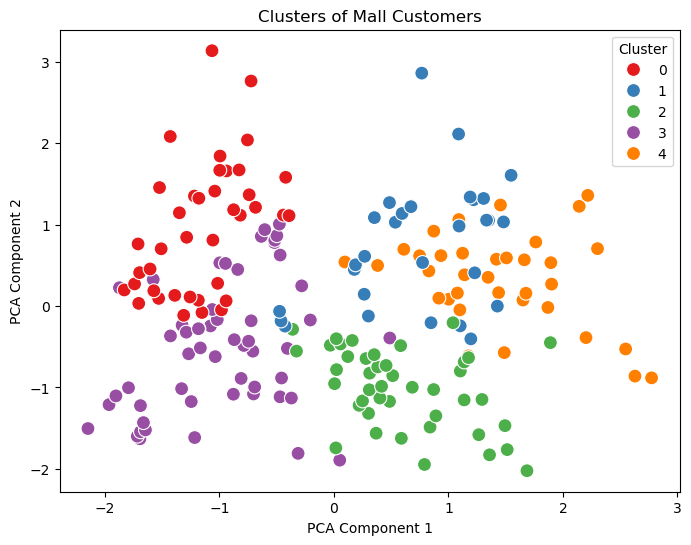

In [8]:
# Visualizing the Clusters
# For better visualization, we will use PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Print the explained variance ratio to understand the amount of variance captured by the 2 components
print(f'Explained variance ratio of PCA components: {pca.explained_variance_ratio_}')

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters of Mall Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [9]:
# Evaluate Clustering Performance using Silhouette Score
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score for Clustering: {sil_score}')

Silhouette Score for Clustering: 0.3040600988258827



Cluster Centers (in original scale):
          Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  4.615385e-01  32.692308           86.538462               82.128205
1  4.482759e-01  36.482759           89.517241               18.000000
2 -5.551115e-17  49.813953           49.232558               40.069767
3  4.074074e-01  24.907407           39.722222               61.203704
4  1.000000e+00  55.714286           53.685714               36.771429


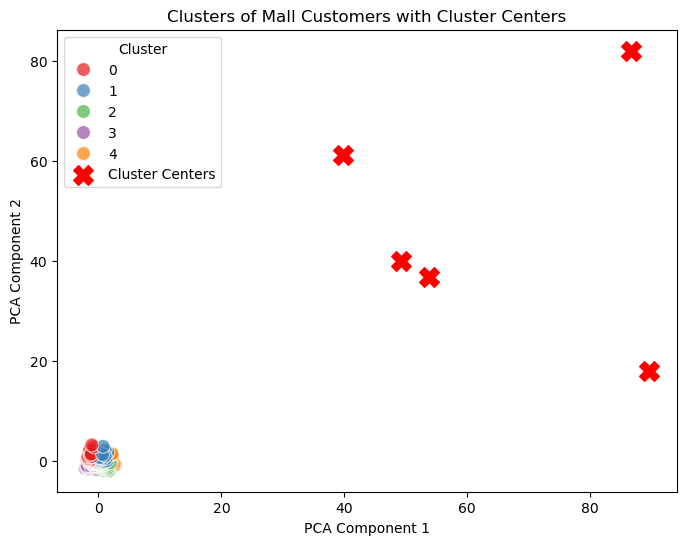

In [10]:
# Analyze the Cluster Centers
# You can also analyze the cluster centers to understand the characteristics of each cluster
cluster_centers = kmeans.cluster_centers_

# Print the cluster centers (after inverse scaling for original values)
cluster_centers_original = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for better readability
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=df.columns[:-1])  # Excluding 'Cluster' column
print("\nCluster Centers (in original scale):")
print(cluster_centers_df)

# Visualizing the cluster centers on the PCA plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.scatter(cluster_centers_df['Annual Income (k$)'], cluster_centers_df['Spending Score (1-100)'], 
            s=200, c='red', marker='X', label='Cluster Centers')
plt.title('Clusters of Mall Customers with Cluster Centers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster Summary (mean of each feature per cluster):
            Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.461538  32.692308           86.538462               82.128205
1        0.448276  36.482759           89.517241               18.000000
2        0.000000  49.813953           49.232558               40.069767
3        0.407407  24.907407           39.722222               61.203704
4        1.000000  55.714286           53.685714               36.771429

Cluster Counts:
Cluster
0    39
1    29
2    43
3    54
4    35
dtype: int64

Cluster Median:
         Genre   Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                         
0          0.0  32.0                79.0                    83.0
1          0.0  37.0                86.0                    17.0
2          0.0  49.0                50.0                    43.0
3          0.0  

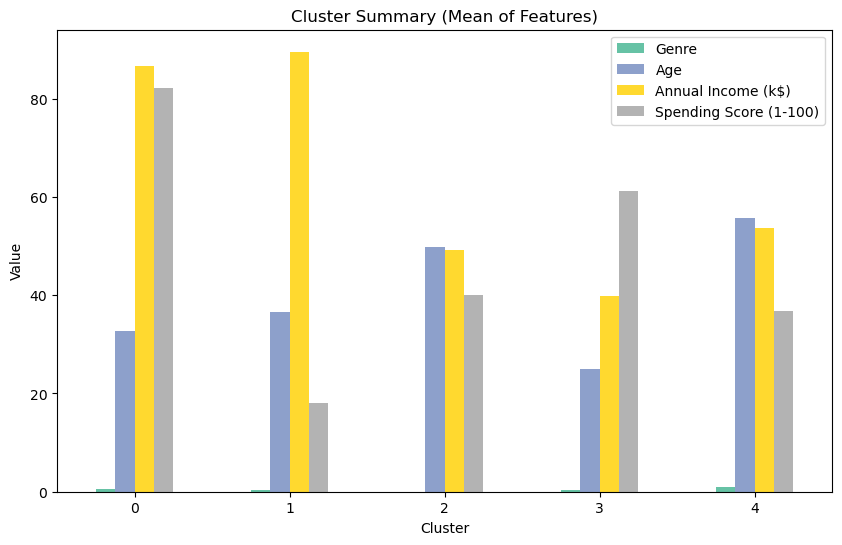

In [11]:
# Further Analysis
# Calculate the mean of each cluster and print a summary
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary (mean of each feature per cluster):")
print(cluster_summary)

# Calculate other statistics like count, median, or standard deviation
cluster_count = df.groupby('Cluster').size()
cluster_median = df.groupby('Cluster').median()
cluster_std = df.groupby('Cluster').std()

# Print additional statistics
print("\nCluster Counts:")
print(cluster_count)

print("\nCluster Median:")
print(cluster_median)

print("\nCluster Standard Deviation:")
print(cluster_std)

# Visualizing cluster summary for each feature
cluster_summary.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Cluster Summary (Mean of Features)')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()